# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [1]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

Package 'mclust' version 5.4.1
Type 'citation("mclust")' for citing this R package in publications.


     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

In [2]:
clus <-Mclust(datos, G=4)
summary(clus)
clus
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log.likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

Ejercicio 1: 
a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.
b) Interprete y comente los resultados obtenidos. 

<b>a) El metodo mclust toma como parametros un set de datos y el tamaño del vector de componentes que determinara la cantidad de grupos a los que pertenecen, la salida son los animales con las distintas agrupaciones. </b>


<b>b) se agruparon los animales segun los la cantidad de grupos que se realizarón, el grupo 1 posee un 89% de agua, un 2% de proteina etc. cada grupo tiene un cierto porcentaje de algun componente</b>

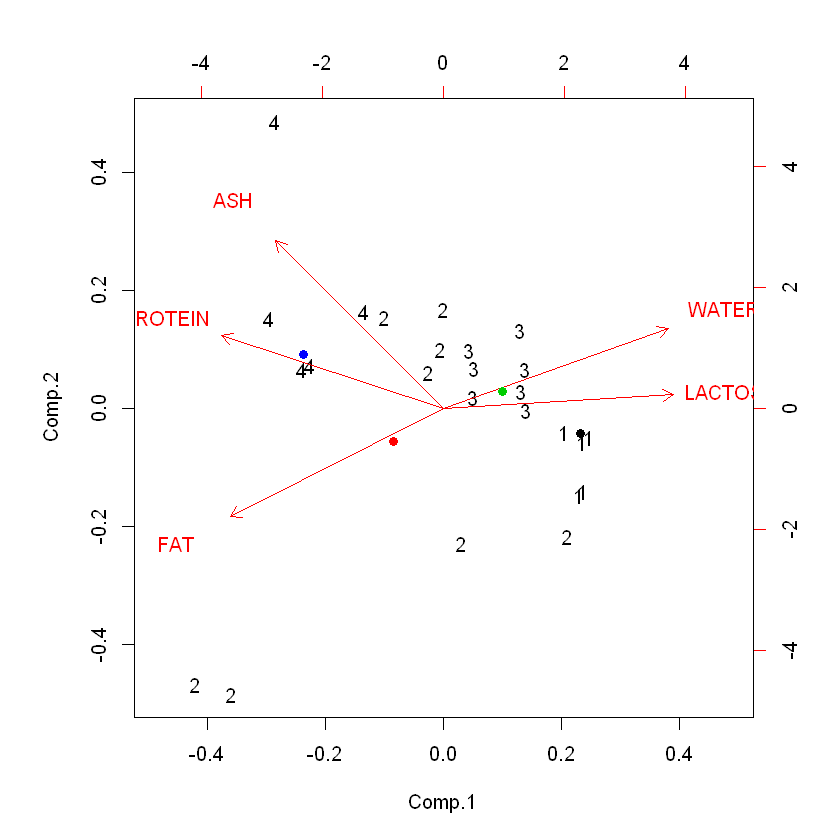

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)
biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)

Ejercicio 2: Repita el procedimiento considerando 2, 3 y 4 grupos. Discuta y compare  sus resultados con aquellos obtenidos con k-means

In [4]:
#GMM
ngrupo <- 2
clus <-Mclust(datos, G=ngrupo)
clus
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl
print("##############################################################")
#Kmean
cl<-kmeans(datos,ngrupo,iter.max=1000,nstart=10)
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl

'Mclust' model object: (EVV,2) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
84.69570,5.001479,4.969356,4.821686,0.7596701
61.41853,9.328688,24.053235,2.356288,1.1297551


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          1          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          2          2

[1] "##############################################################"


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,1.112848,0.06603277,0.09432454,-0.03162076,0.0008469003
2,-2.364801,-0.14031964,-0.20043965,0.06719411,-0.0017996632


K-means clustering with 2 clusters of sizes 17, 8

Cluster means:
     WATER  PROTEIN       FAT  LACTOSE       ASH
1 85.48824 4.570588  4.488235 4.994118 0.6688235
2 62.66250 9.700000 22.675000 2.300000 1.2762500

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          2          2 

Within cluster sum of squares by cluster:
[1]  521.8994 1664.9235
 (between_SS / total_SS =  68.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] 

<b>Los resultados son muy parecidos, la unica diferencia es que con la cantidad de grupos el conejo pertenece al grupo 1 en el GMM y en el Kmean pertenece al grupo 2 </b>

In [5]:
#GMM
ngrupo <- 3
clus <-Mclust(datos, G=ngrupo)
clus
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl
print("##############################################################")
#Kmean
cl<-kmeans(datos,ngrupo,iter.max=1000,nstart=10)
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl

'Mclust' model object: (EEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
86.26361,3.879049,3.921919,5.221110,0.6421765
72.23683,7.520039,14.782487,3.660315,0.7079534
64.28310,10.566706,21.483587,1.983296,1.5083364


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          3          2

[1] "##############################################################"


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,1.243827,0.0248324,0.07949783,-0.02299768,0.004865841
2,-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957
3,-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362


K-means clustering with 3 clusters of sizes 16, 2, 7

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 86.06250  4.275000  4.17500 5.118750 0.635625
2 45.65000 10.150000 38.45000 0.450000 0.690000
3 69.47143  9.514286 16.28571 2.928571 1.432857

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          3          3          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          2          2 

Within cluster sum of squares by cluster:
[1] 377.2215  27.1912 299.9911
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

In [6]:
#GMM
ngrupo <- 4
clus <-Mclust(datos, G=ngrupo)
clus
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl
print("##############################################################")
#Kmean
cl<-kmeans(datos,ngrupo,iter.max=1000,nstart=10)
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

[1] "##############################################################"


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,1.87606405,-0.2017241,-0.007713097,0.09635908,-0.003291286
2,-1.87604083,0.5598512,-0.299886203,0.09929465,0.007419768
3,0.02253818,0.4485425,0.240092595,-0.21444910,0.006758595
4,-3.83108138,-2.2408320,0.097900012,-0.02910750,-0.029457957


K-means clustering with 4 clusters of sizes 10, 6, 7, 2

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE       ASH
1 88.50000  2.570000  2.80000 5.680000 0.4850000
2 68.33333  9.550000 17.41667 2.916667 1.4716667
3 81.18571  7.428571  6.90000 4.014286 0.9314286
4 45.65000 10.150000 38.45000 0.450000 0.6900000

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          3          3          3          1          1          3 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          3          3          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          4          4 

Within cluster sum of squares by cluster:
[1]  59.41225 191.74708  63.53491  27.19120
 (between_SS / tot

<b> Las agrupaciones cuando se hacen 3 y 4 grupos cambian totalmente porque se crean grupos distintos en GMM y Kmean </b>

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

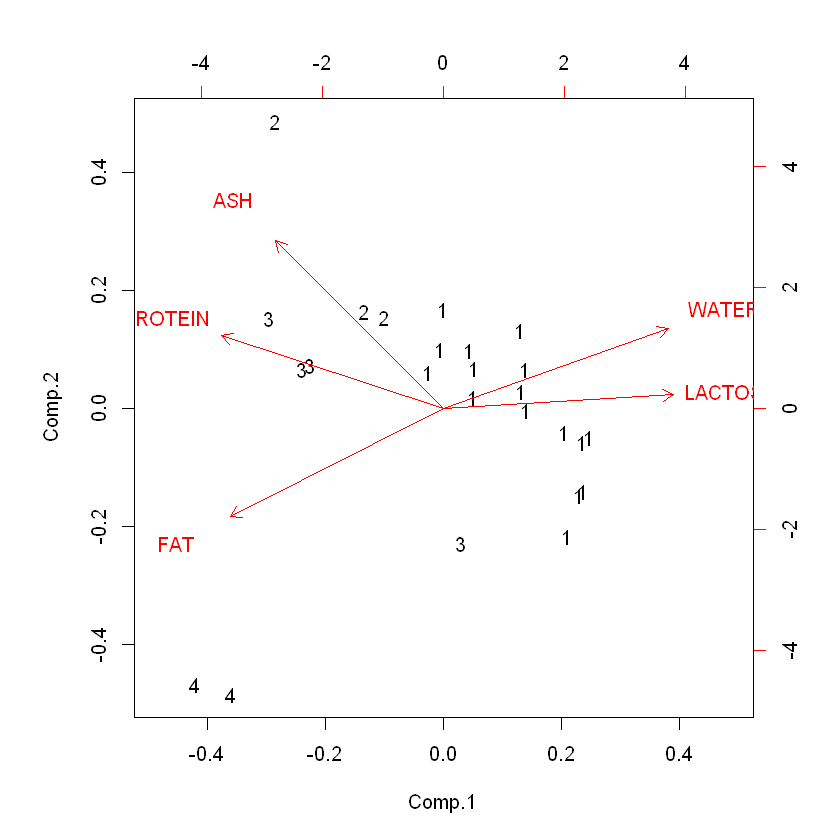

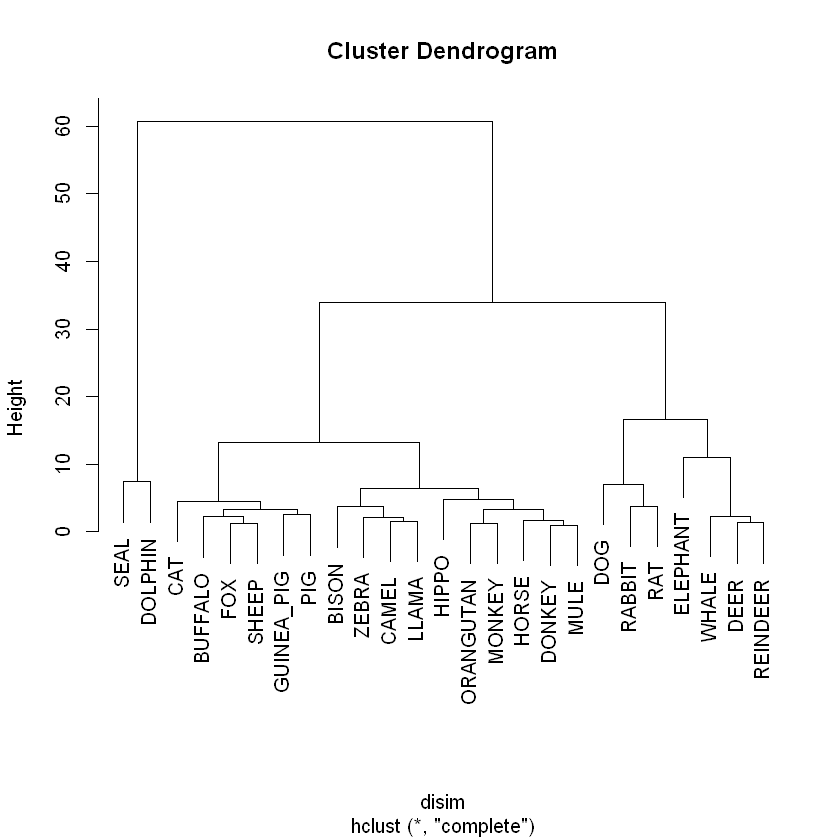

In [8]:
disim <- dist(datos)
res3 <- hclust(disim)
biplot(res, xlabs= cutree(res3,4))
plot(res3)

In [9]:
Ejercicio 3: 
a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

el metodo hclust toma como input la matriz de disimilaridad,
el metodo (single, complete, average. Metodos vistos de clusterizacion jerarquica) y  members que por defecto es nulo.
la salida es un cluster dendogram.

b) Interprete y comente los resultados obtenidos.

por defecto hclust entrega un dendograma utilizando el metodo complete link, por tanto el resultado es un dendograma aglomerativo

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:11: unexpected numeric constant
1: Ejercicio 3
              ^


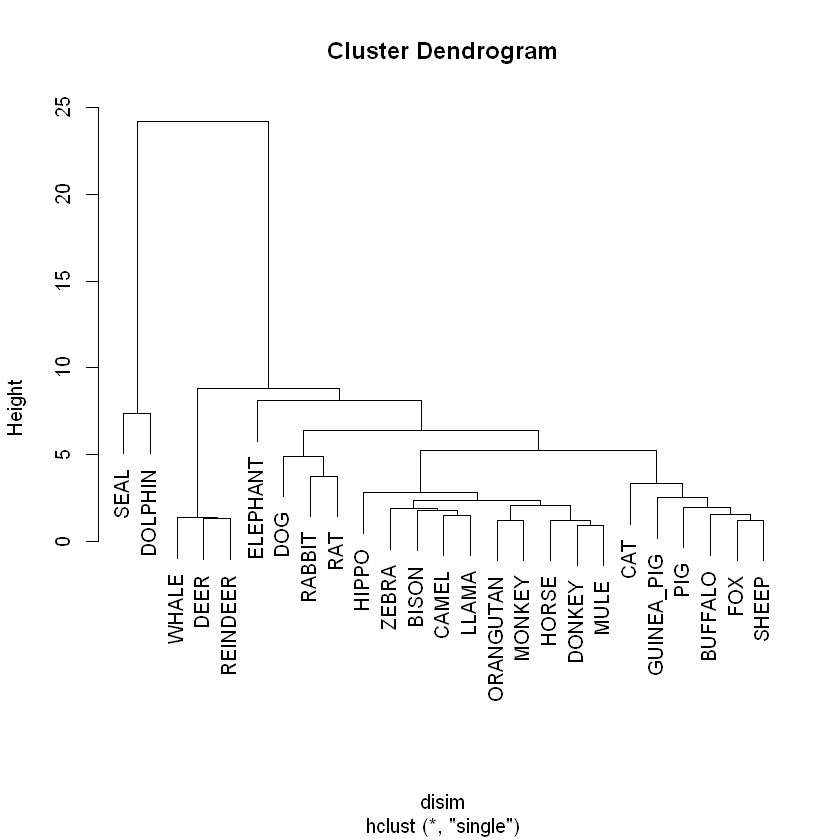

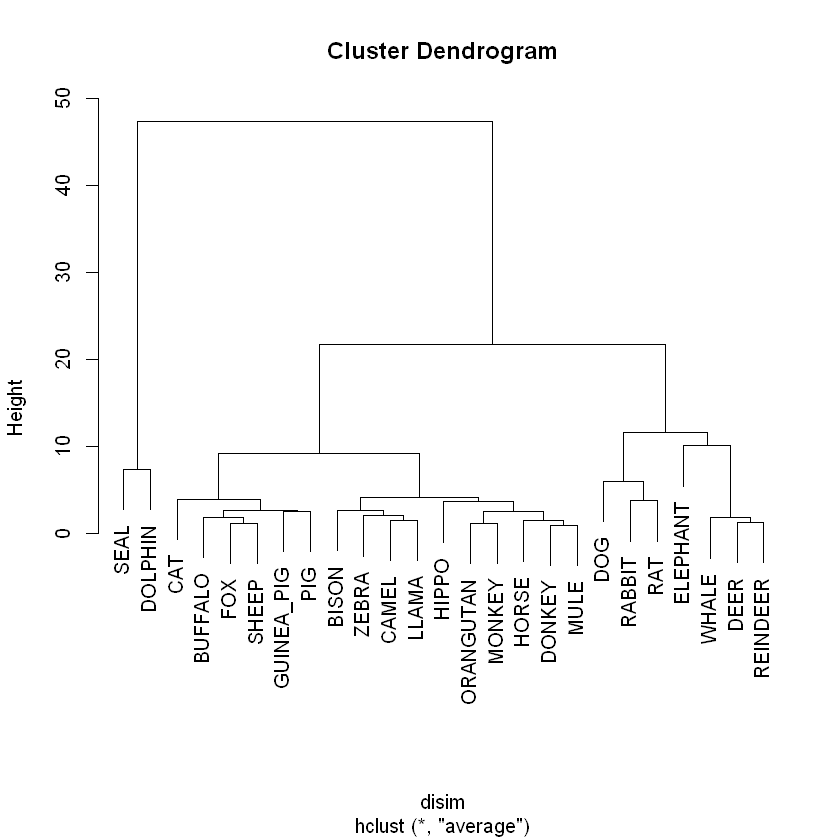

In [11]:
plot(hclust(disim,method="single"))

plot(hclust(disim,method="average"))


<b> Los cambios mas notorios son los cambios jerarquicos, ya que se puede notar que los animales son agrupados casi de la misma
forma en los dos tipos de hclust</b>

In [ ]:
Ejercicio 4: 
a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv
Interprete sus resultados.
b) Calcule alguna de las medidas de calidad estudiadas (purity, rand index o mutual information) 
para cada uno de los análisis realizado en (a). Discuta sus resultados.

  [1] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
  [5] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
  [9] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
 [13] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
 [17] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
 [21] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
 [25] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
 [29] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
 [33] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
 [37] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
 [41] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
 [45] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
 [49] Iris-setosa     Iris-setosa     Iris-versicolor Iris-versicolor
 [53] Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor
 [57] Iris-versicolo

 SepalLengthCm    SepalWidthCm   PetalLengthCm    PetalWidthCm  
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
5.125455,3.523204,1.462202,0.2724583
4.677193,3.128422,1.468950,0.1656670
5.912846,2.779223,4.204193,1.2993252
6.549201,2.948315,5.483281,1.9858388


[1] 1 1 1 2 1 1 1 1 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 2 1 1
 [38] 2 2 1 1 1 2 1 1 1 1 2 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 4 3
 [75] 3 3 3 4 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4
[112] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[149] 4 4

[1] "##############################################################"


,Comp.1,Comp.2,Comp.3,Comp.4
1,2.0324096,0.6861101,-0.03610243,0.0167654746
2,1.0464401,-0.1922860,0.02903209,-0.0007370641
3,0.1469626,-1.0312616,-0.07870576,-0.0501007159
4,-2.2201933,0.2922248,0.04395511,0.0179161484


K-means clustering with 4 clusters of sizes 32, 40, 28, 50

Cluster means:
  SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm
1      6.912500     3.100000      5.846875     2.131250
2      6.252500     2.855000      4.815000     1.625000
3      5.532143     2.635714      3.960714     1.228571
4      5.006000     3.418000      1.464000     0.244000

Clustering vector:
  [1] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [38] 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 [75] 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 1 2 1 1 1 1 3 1 1 1 2
[112] 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 2
[149] 1 2

Within cluster sum of squares by cluster:
[1] 18.703437 13.624750  9.749286 15.240400
 (between_SS / total_SS =  91.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

[1] "##############################################################"


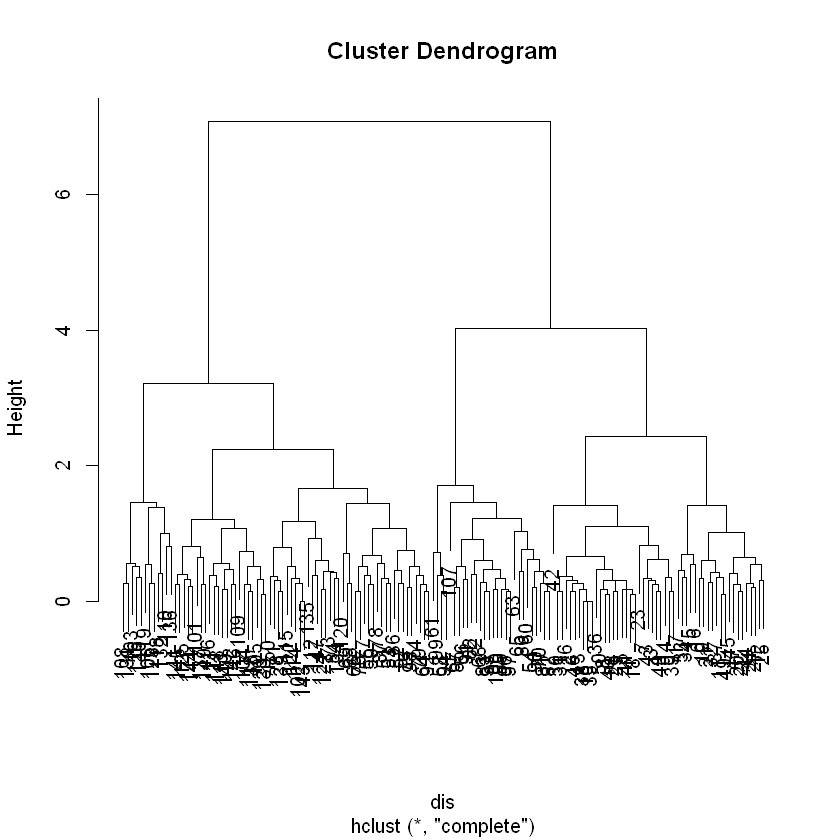

In [37]:

data<- read.csv("Iris.csv",sep=",",header=TRUE )
ft <- data[2:5] #Obtener solo los features
especies<-data$Species

dis <- dist(ft)



ngrupo <- 4
clus <-Mclust(ft, G=ngrupo)
clus
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl
print("##############################################################")
#Kmean
cl<-kmeans(ft,ngrupo,iter.max=1000,nstart=10)
res <- princomp(ft, cor=TRUE)
predict(res,cl$centers)
cl
print("##############################################################")

plot(hclust(dis))